In [1]:
import pandas as pd

In [2]:
# Load the benchmark
benchmark_path = "benchmark_new.csv"

benchmark = pd.read_csv(benchmark_path) 

In [3]:
from collections import defaultdict

def get_performance(dataframe, variation):
    """ Collects performance data from the given Pandas dataframe """
    
    var_data = dataframe[dataframe['variation'] == variation]
    
    # Average until the counter resets
    runtimes = defaultdict(list)
    cputimes = defaultdict(list)
    for _, row in var_data.iterrows():
        # Simply add the runtimes and cputimes to the correct dict under the correct thread
        runtimes[row["num_threads"]].append(row["runtime"])
        cputimes[row["num_threads"]].append(row["cputime"])

    # Take the average
    runtimes = { thread : sum(times) / len(times) for thread, times in runtimes.items() }
    cputimes = { thread : sum(times) / len(times) for thread, times in cputimes.items() }
    
    return runtimes, cputimes

In [4]:
# Collect the average of all sequential data
baseline_runtimes, baseline_cputimes = get_performance(benchmark, "sequential")
baseline_runtimes, baseline_cputimes = baseline_runtimes["-"], baseline_cputimes["-"]

print(baseline_runtimes)
print(baseline_cputimes)

91.1100608
91.106


In [9]:
import matplotlib.pyplot as plt

def plot_performance(mode, benchmark, baseline_data):
    #""" Here, the data is actually plotted """
    
    # Plot the runtimes in a subplot
    fig, ax = plt.subplots(2, 4, sharey=True, figsize=(20,10))
    threads = [2, 4, 6, 8, 10, 12, 16]
    for i in range(8):
        x = i % 4
        y = i // 4
        
        # Acquire this variation's performance stats
        variation = f"OMP_CPU{i + 1}"
        data = get_performance(benchmark, f"{variation}")
        
        ax[y, x].set_title(f"Average {['runtimes', 'cputimes'][mode]} for {variation}")
        ax[y, x].set_xlabel("Number of threads")
        ax[y, x].set_ylabel(f"{['Runtimes', 'Cputimes'][mode]} (seconds)")
        ax[y, x].plot(threads, [baseline_data[mode] for t in threads], label=f"sequential (baseline)")
        ax[y, x].plot(threads, [data[mode][str(t)] for t in threads], '-o', label=f"{variation}")
        ax[y, x].grid()
        ax[y, x].legend()

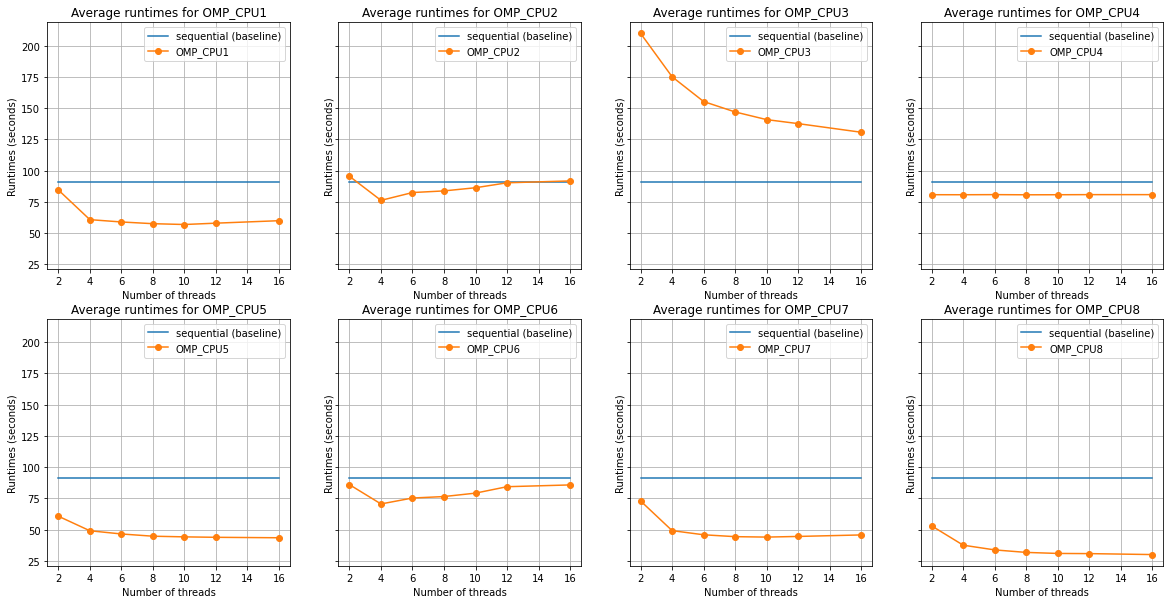

In [10]:
plot_performance(0, benchmark, (baseline_runtimes, baseline_cputimes))

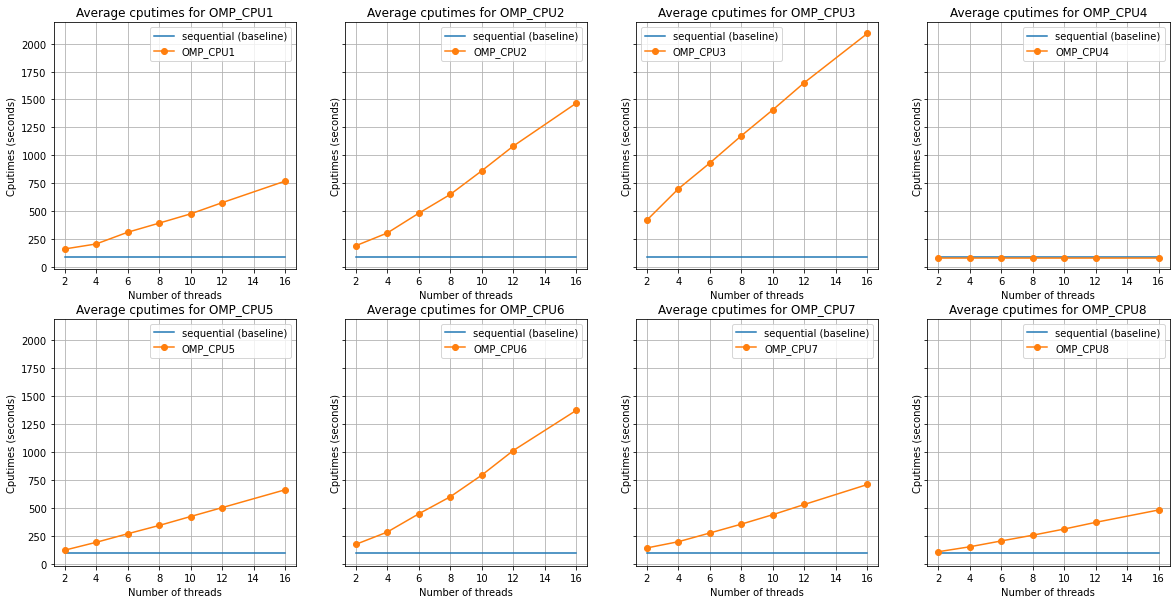

In [11]:
plot_performance(1, benchmark, (baseline_runtimes, baseline_cputimes))

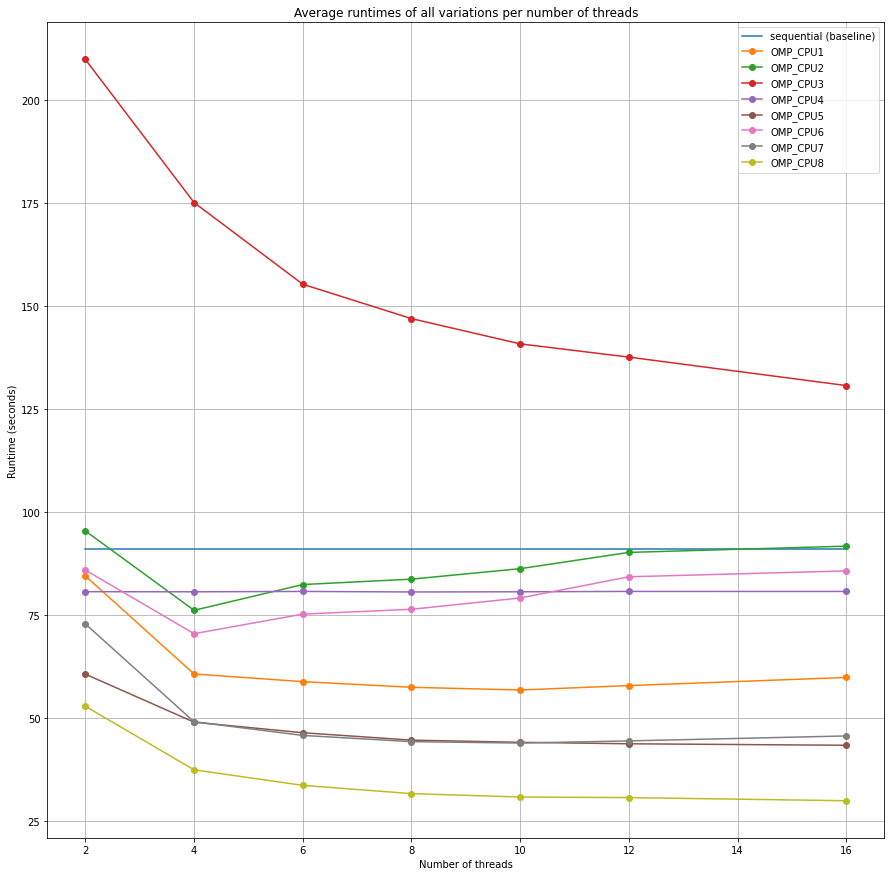

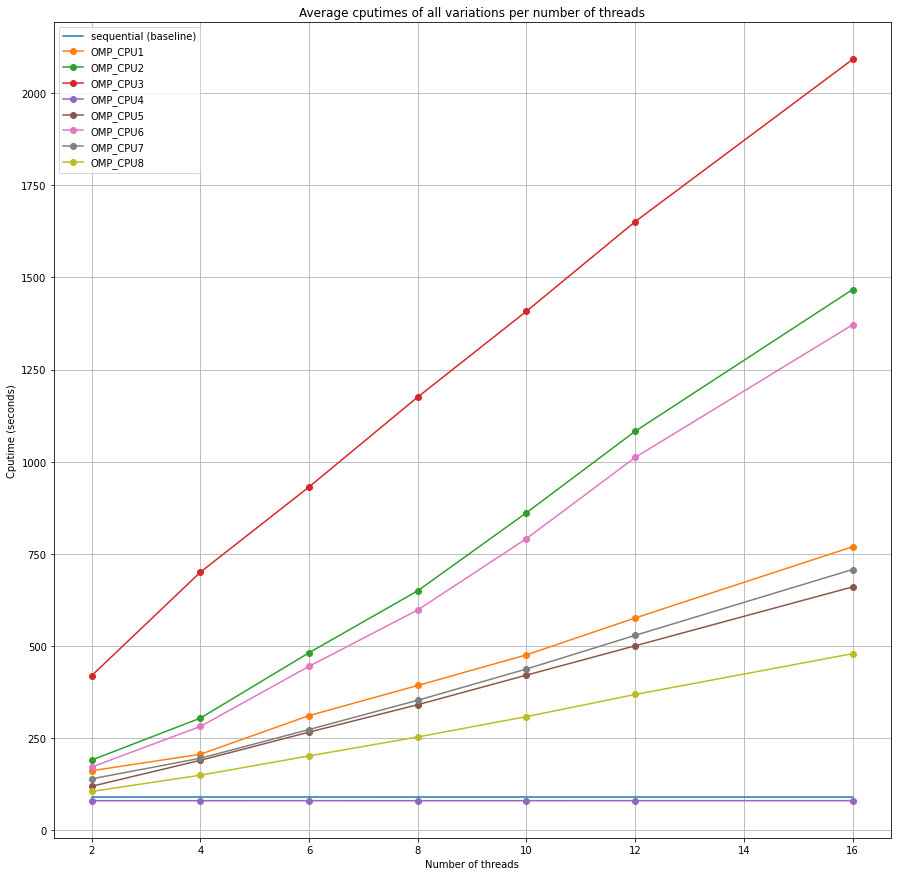

In [12]:
# Plot a general one for the runtimes
plt.figure(figsize=(15,15))
plt.title(f"Average runtimes of all variations per number of threads")
plt.xlabel("Number of threads")
plt.ylabel("Runtime (seconds)")
xs = [2, 4, 6, 8, 10, 12, 16]
plt.plot(xs, [baseline_runtimes for x in xs], label=f"sequential (baseline)")
for i in range(8):
    plt.plot(xs, [get_performance(benchmark, f"OMP_CPU{i + 1}")[0][str(x)] for x in xs], '-o', label=f"OMP_CPU{i + 1}")
plt.legend()
plt.grid()
plt.show()

# Plot a general one for the cputimes
plt.figure(figsize=(15,15))
plt.title(f"Average cputimes of all variations per number of threads")
plt.xlabel("Number of threads")
plt.ylabel("Cputime (seconds)")
xs = [2, 4, 6, 8, 10, 12, 16]
plt.plot(xs, [baseline_cputimes for x in xs], label=f"sequential (baseline)")
for i in range(8):
    plt.plot(xs, [get_performance(benchmark, f"OMP_CPU{i + 1}")[1][str(x)] for x in xs], '-o', label=f"OMP_CPU{i + 1}")
plt.legend()
plt.grid()
plt.show()